# Shriddha Vishwakarma

## The Sparks Foundation - GRIP Mar 21
## Task 1- Prediction using Supervised ML
##### Dataset : http://bit.ly/w-data

#### Importing librabries required

In [1]:
#Importing Pandas and Numpy libraries

import pandas as pd
import numpy as np

In [2]:
#Importing matplotlib library

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Importing seaborn for data visualization

import seaborn as sns

#### Reading the data

In [4]:
#assigning variable to the url where raw data is stored

url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

In [5]:
#reading the data 

data = pd.read_csv(url)

print(type(data)) 
data.head()

<class 'pandas.core.frame.DataFrame'>


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Exploring the data

In [6]:
#Columns in the dataset

data.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
#Summary of dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
#Descriptive statistics of the dataset

data.describe() 

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Plotting the distribution of scores
On plotting the scores against the number of hours studied we observe that the scores increase with the no. of hours studied, indicating a positive linear relation between them.

The size of the markers increase with the number of hours.

<AxesSubplot:title={'center':'No. of Hours Studied vs Scores Attained'}, xlabel='Hours', ylabel='Scores'>

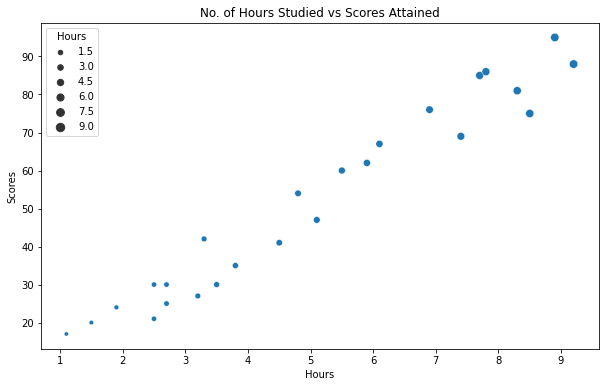

In [9]:
#Plotting the distribution of scores 

plt.figure(figsize = (10,6)) #size of the plot
plt.title('No. of Hours Studied vs Scores Attained') #title of the plot
sns.scatterplot(data= data,x='Hours',y='Scores',size='Hours') 

### Training a linear regression model

#### Splitting the data into X (attributes) and y (labels/target variable) arrays

In [10]:
X = data.iloc[:,:-1].values #extracting no. of hours
X # 2 D array

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
y = data.iloc[:,1].values #extracting scores
y # 1 D array

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Train Test split
#### Splitting the data into a training set and a testing set

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Creating and training the model
We will train our model on the training set.

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm = LinearRegression() 

In [16]:
lm.fit(X_train,y_train)

LinearRegression()

### Model Evaluation
Using the test set to evaluate our model

In [17]:
print(lm.intercept_) #printing the regression intercept

2.0181600414346974


In [18]:
print(lm.coef_) #printing the regression coefficient

[9.91065648]


In [19]:
line = lm.coef_ * X + lm.intercept_ #fitted regression line

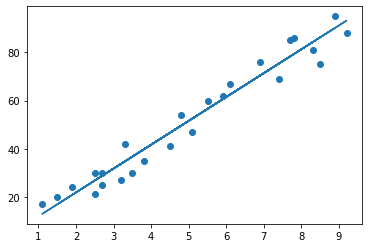

In [20]:
plt.scatter(X, y)
plt.plot(X, line) 
plt.show()

## Predictions from our model

In [21]:
print(X_test)
y_pred = lm.predict(X_test) #predicting scores using testing data

print(y_pred) #predicted scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


#### Comparing predictions with actual labels

In [22]:
df = pd.DataFrame({'Actual labels': y_test, 'Predicted labels': y_pred})
df

,Actual labels,Predicted labels
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Regression Evaluation Metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors

**Mean Squared Error** (MSE) is the mean of the squared errors

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors


In [23]:
#importing regression evaluation metrics
from sklearn import metrics

In [24]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4.183859899002975
MSE: 21.598769307217406
RMSE: 4.647447612100367


#### Testing the model with our own data
Predicting the score when number of hours is 9.25

In [25]:
hours = [[9.25]]
prediction = lm.predict(hours)
print("No of Hours =", hours[0][0])
print("Predicted Score = ", prediction[0])

No of Hours = 9.25
Predicted Score =  93.69173248737535


# Thank you!